In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV
import time
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

In [109]:
train_fname = '../data/train_cat_1.csv'
test_fname = '../data/test_cat_1.csv'
df = pd.read_csv(train_fname, sep=';')
df_test = pd.read_csv(test_fname, sep=';')
n_samples,n_variables = df.shape

In [110]:
f_cat = ['VOIE_DEPOT','COUNTRY','SOURCE_BEGIN_MONTH','FISRT_APP_COUNTRY','FISRT_APP_TYPE','LANGUAGE_OF_FILLING',
        'FIRST_CLASSE','TECHNOLOGIE_SECTOR','TECHNOLOGIE_FIELD','MAIN_IPC','FISRT_INV_COUNTRY','FISRT_INV_TYPE','SOURCE_CITED_AGE',
        'SOURCE_IDX_ORI','SOURCE_IDX_RAD']

In [111]:
y_fname = '../data/y_train_1.csv'
df_y = pd.read_csv(y_fname, sep=';')

In [112]:
X_train = df[f_cat].values
X_test = df_test[f_cat].values
y_train = df_y['VARIABLE_CIBLE'].values == 'GRANTED'

In [113]:
encoder = OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [114]:
params = {'alpha':[1.3]}
def scorer(estimator, X, y):
    return roc_auc_score(y, estimator.predict_proba(X)[:,1])
clf = GridSearchCV(BernoulliNB(), params, scorer, n_jobs = -1)
start = time.time()
clf.fit(X_train, y_train)
print('{} secondes pour fit.'.format(time.time() - start))
y_pred_train = clf.predict_proba(X_train)[:, 1]
print('Params : {}'.format(clf.best_params_))
print('Score réaliste après CV : %s' % clf.best_score_)

In [105]:
# 0.614464640228
# 0.628047903556 le 24/02/16, après avoir un peu affiné le set. Youpi !
# 0.645159558928 le 29/02/16, avec tout le set et une bonne représentation des données. alpha = 1.3 (cross-validé)
# sub de test à 0.643220239895, donc léger overfit !

In [115]:
y_pred = clf.predict_proba(X_test)[:, 1]
np.savetxt('../subs/cate_bayes_4_29.02.16.txt', y_pred, fmt='%s')

In [116]:
pd.DataFrame(data=clf.predict_proba(X_train)[:,1], columns=['VARIABLE_CIBLE']).to_csv(path_or_buf='../y_trained/cate_bayes_4_29.02.26.txt', sep=';')

In [9]:
from sklearn.externals import joblib
joblib.dump(clf, '../trained_models/cate_bayes_2_24_02_16.pkl')

['../trained_models/cate_bayes_2_24_02_16.pkl',
 '../trained_models/cate_bayes_2_24_02_16.pkl_01.npy',
 '../trained_models/cate_bayes_2_24_02_16.pkl_02.npy',
 '../trained_models/cate_bayes_2_24_02_16.pkl_03.npy',
 '../trained_models/cate_bayes_2_24_02_16.pkl_04.npy',
 '../trained_models/cate_bayes_2_24_02_16.pkl_05.npy']

In [11]:
from sklearn.metrics import roc_curve

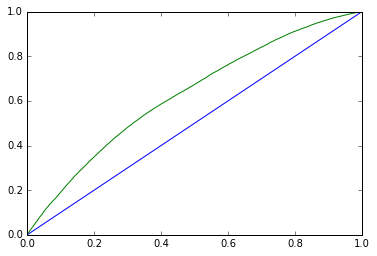

In [12]:
fpr, tpr, thresholds = roc_curve(y_train,y_pred_train)
plt.plot([0,1],[0,1])
plt.plot(fpr, tpr, lw=1)

(array([ 17490.,  36858.,  23374.,  19032.,  14282.,  17362.,  18752.,
         25376.,  35355.,  51550.]),
 array([ 0.0024003 ,  0.10192628,  0.20145227,  0.30097825,  0.40050423,
         0.50003021,  0.59955619,  0.69908218,  0.79860816,  0.89813414,
         0.99766012]),
 <a list of 10 Patch objects>)

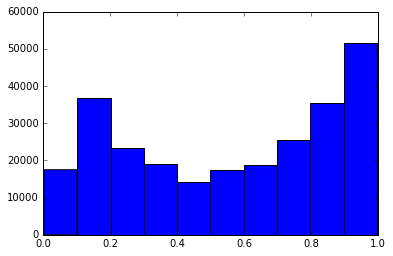

In [13]:
plt.hist(y_pred_train)

(array([ 25934.,  16931.,  14083.,  19526.,  31258.,  60560.,  27388.,
         17632.,  22443.,  23676.]),
 array([-0.9961661 , -0.79723496, -0.59830383, -0.39937269, -0.20044155,
        -0.00151041,  0.19742073,  0.39635187,  0.59528301,  0.79421415,
         0.99314529]),
 <a list of 10 Patch objects>)

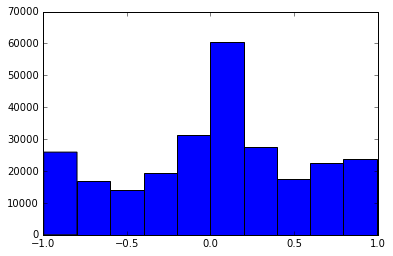

In [14]:
plt.hist(y_train - y_pred_train)

ValueError: x and y must have same first dimension

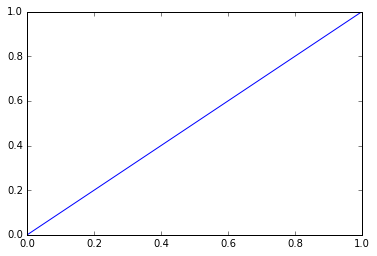

In [15]:
y_pred_train2 = y_pred_train
for i in range(n_samples):
    if(y_pred_train2[i] <= 0.2):
        y_pred_train2[i] = 0.
    elif(y_pred_train2[i] >= 0.8):
        y_pred_train2[i] = 1.
        
pr, tpr, thresholds = roc_curve(y_train,y_pred_train2)
plt.plot([0,1],[0,1])
plt.plot(fpr, tpr, lw=1)

In [ ]:
plt.hist(y_pred_train2)

In [ ]:
print('Score (optimiste) sur le train : %s' % roc_auc_score(y_train, y_pred_train2))

In [ ]:
plt.hist(y_train - y_pred_train2)